In [1]:
import os
import numpy as np
from metavision_sdk_core import BaseFrameGenerationAlgorithm
from metavision_core.event_io import EventsIterator
import metavision_sdk_cv
import cv2

from ipywidgets import interact 
from PIL import Image

In [2]:
from metavision_core.utils import get_sample

sequence_filename = r"D:\OneDrive\Documents\evk_samples\vlc_backscatter\data\1m_dark_no_diff_5k.raw"

# get_sample(sequence_filename, folder=".")
# assert(os.path.isfile(sequence_filename))

In [3]:
mv_it = EventsIterator(sequence_filename)
height, width = mv_it.get_size()

frequency_filter = metavision_sdk_cv.FrequencyAlgorithm(width=width, height=height, min_freq=5, max_freq=6000)
frequency_clustering_filter = metavision_sdk_cv.FrequencyClusteringAlgorithm(width=width, height=height,
                                                                             min_cluster_size=5, max_time_diff=10000)

freq_buffer = frequency_filter.get_empty_output_buffer()
cluster_buffer = frequency_clustering_filter.get_empty_output_buffer()


im = np.zeros((height, width, 3), dtype=np.uint8)

for idx, ev in enumerate(mv_it):

    if idx >= 10000:
        break

    BaseFrameGenerationAlgorithm.generate_frame(ev, im)

    frequency_filter.process_events(ev, freq_buffer)
    frequency_clustering_filter.process_events(freq_buffer, cluster_buffer)
    if cluster_buffer.numpy().shape[0] > 0:
        print(cluster_buffer.numpy())
    for cluster in cluster_buffer.numpy():
        x0 = int(cluster["x"]) - 10
        y0 = int(cluster["y"]) - 10
        cv2.rectangle(im, (x0, y0), (x0+20, y0+20), color=(0, 255, 0))
        cv2.putText(im, "id_{}: {} Hz".format(cluster["id"], int(cluster["frequency"])), (x0, y0-10), cv2.FONT_HERSHEY_PLAIN,
                    1, (0, 255, 0), 1)

    cv2.imshow("Events", im[...,::-1])
    cv2.waitKey(0)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

[(688.285, 217.84958, 335062, 1666.7944, 3881, 5, 2706)]
[(688.3339, 218.1182, 619865, 1666.4747, 3881, 5, 5211)]
[(688.3689, 218.18422, 629962, 1667.5077, 3881, 5, 5378)]
[(688.2575, 217.84392, 637577, 1666.8883, 3881, 5, 5499)]
[(688.2412, 217.88081, 657568, 1665.1145, 3881, 5, 5719)]
[(688.3934, 218.27255, 679971, 1665.8414, 3881, 5, 6039)]
[(688.418, 218.22955, 689971, 1666.6763, 3881, 5, 6206)]
[(688.31824, 217.95348, 692066, 1667.1826, 3881, 5, 6239)]
[(688.3806, 218.19167, 719957, 1665.9841, 3881, 5, 6551)]
[(688.34143, 218.12573, 729980, 1666.1505, 3881, 5, 6719)]
[(688.33374, 218.11845, 739867, 1666.0265, 3881, 5, 6884)]
[(688.2505, 218.00056, 748873, 1666.0339, 3881, 5, 7032)]
[(688.29346, 217.81943, 755447, 1666.0034, 3881, 5, 7120)]
[(688.7513, 217.31161, 769950, 1667.3972, 3881, 5, 7345)]
[(688.43335, 218.22083, 779972, 1667.846, 3881, 5, 7486)]
[(688.43463, 218.18877, 789972, 1666.928, 3881, 5, 7653)]
[(688.4313, 218.18877, 799862, 1666.2826, 3881, 5, 7818)]
[(688.29175, 

: 

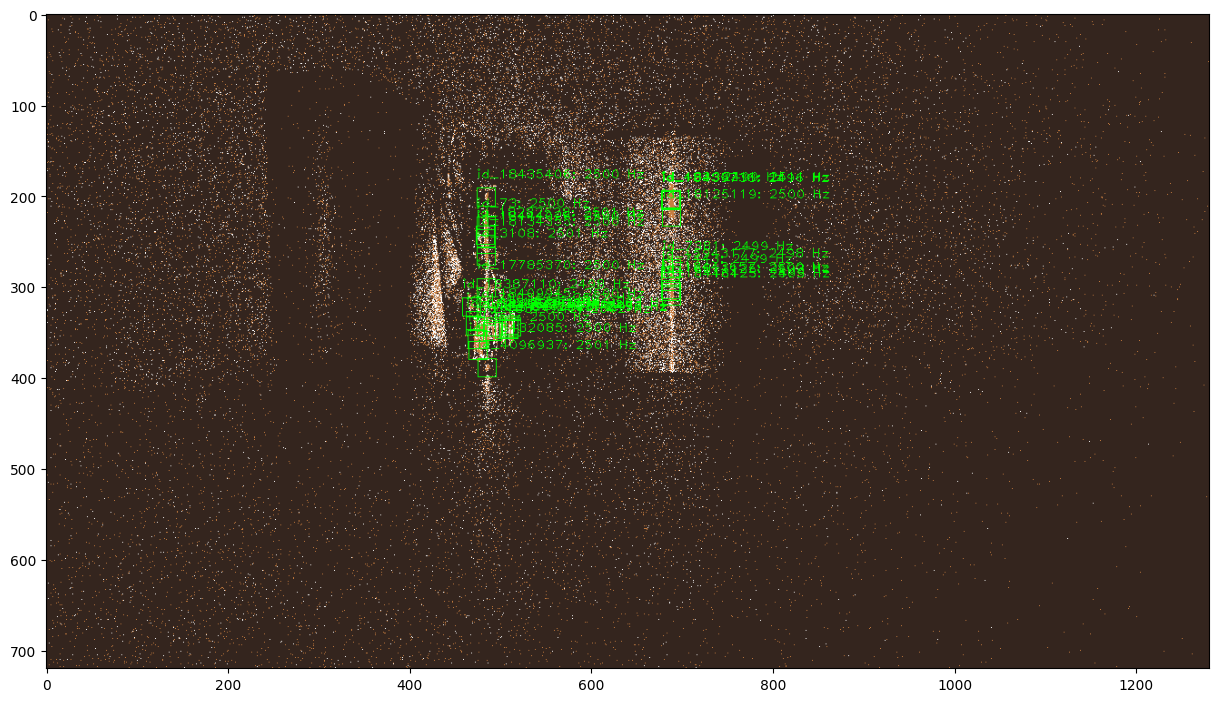

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,15))
plt.imshow(im, aspect="equal")
